Epoch 1/20
782/782 [==============================] - 15s 13ms/step - loss: 3.2070 - accuracy: 0.1068 - val_loss: 2.3326 - val_accuracy: 0.1090
Epoch 2/20
782/782 [==============================] - 10s 12ms/step - loss: 2.3268 - accuracy: 0.1041 - val_loss: 2.3154 - val_accuracy: 0.0961
Epoch 3/20
782/782 [==============================] - 9s 12ms/step - loss: 2.3160 - accuracy: 0.1036 - val_loss: 2.3142 - val_accuracy: 0.1064
Epoch 4/20
782/782 [==============================] - 8s 11ms/step - loss: 2.3115 - accuracy: 0.1034 - val_loss: 2.3142 - val_accuracy: 0.1064
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 2.3110 - accuracy: 0.1039 - val_loss: 2.3169 - val_accuracy: 0.0983
Epoch 6/20
782/782 [==============================] - 9s 12ms/step - loss: 2.3105 - accuracy: 0.1043 - val_loss: 2.3204 - val_accuracy: 0.1064
Epoch 7/20
782/782 [==============================] - 8s 10ms/step - loss: 2.3112 - accuracy: 0.1033 - val_loss: 2.3174 - val_accuracy: 0.09

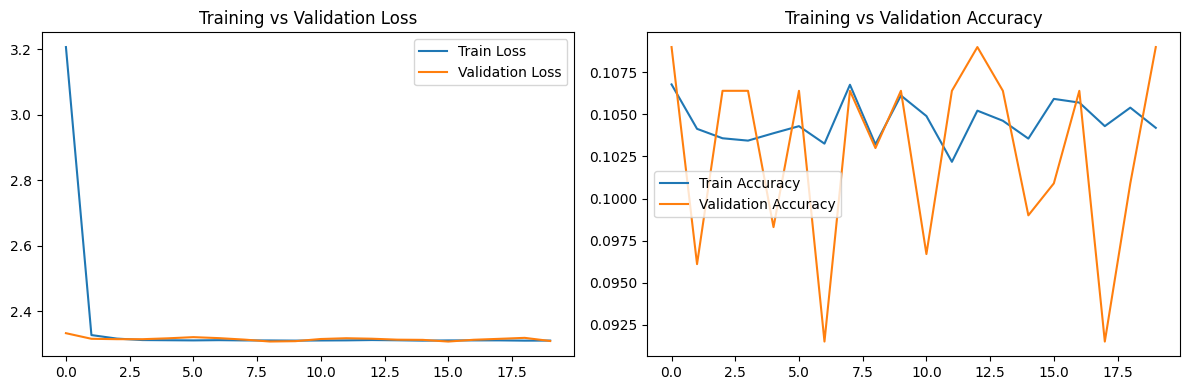

313/313 [==============================] - 1s 3ms/step
F1 Score: 0.0186


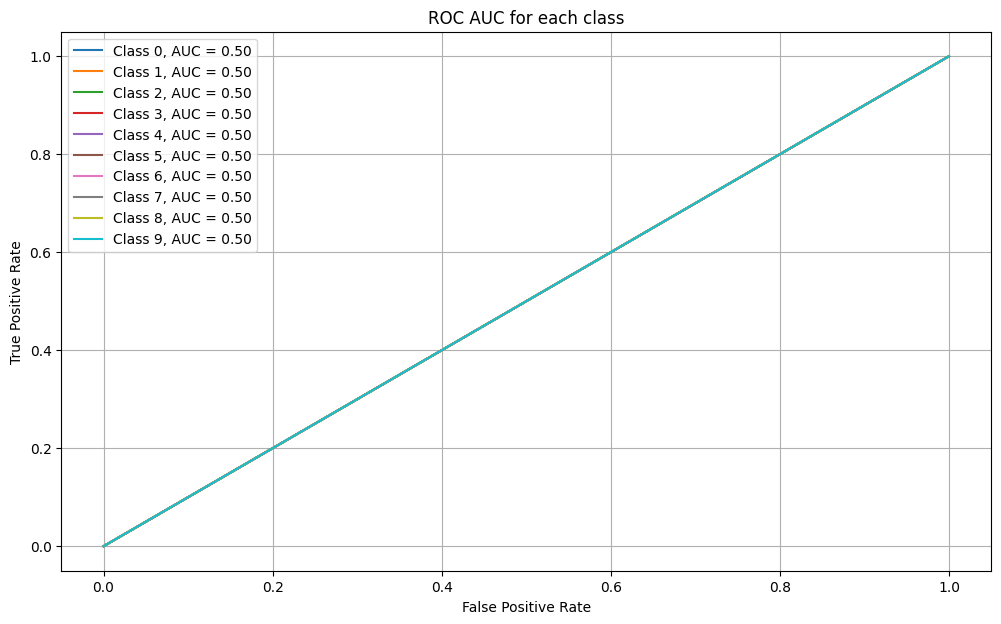

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]

# DNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation=None, kernel_regularizer=l2(0.001)), # Added regularization
    BatchNormalization(),  # Added Batch Normalization before activation
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(10, activation='softmax')
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.1)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=20, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Epoch 1/20
782/782 [==============================] - 13s 11ms/step - loss: 0.9474 - accuracy: 0.8432 - val_loss: 0.8049 - val_accuracy: 0.8443
Epoch 2/20
782/782 [==============================] - 7s 10ms/step - loss: 0.6798 - accuracy: 0.8769 - val_loss: 0.5426 - val_accuracy: 0.9004
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.5701 - accuracy: 0.8940 - val_loss: 0.4424 - val_accuracy: 0.9310
Epoch 4/20
782/782 [==============================] - 7s 10ms/step - loss: 0.5481 - accuracy: 0.9027 - val_loss: 0.4492 - val_accuracy: 0.9298
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 0.5376 - accuracy: 0.9050 - val_loss: 0.4669 - val_accuracy: 0.9310
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.5316 - accuracy: 0.9083 - val_loss: 0.5831 - val_accuracy: 0.8893
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.5406 - accuracy: 0.9097 - val_loss: 0.5348 - val_accuracy: 0.9038


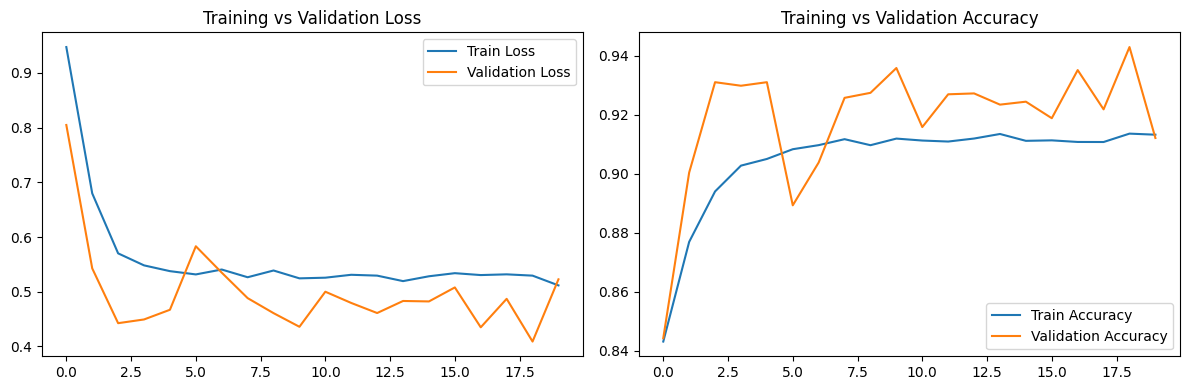

313/313 [==============================] - 1s 3ms/step
F1 Score: 0.8973


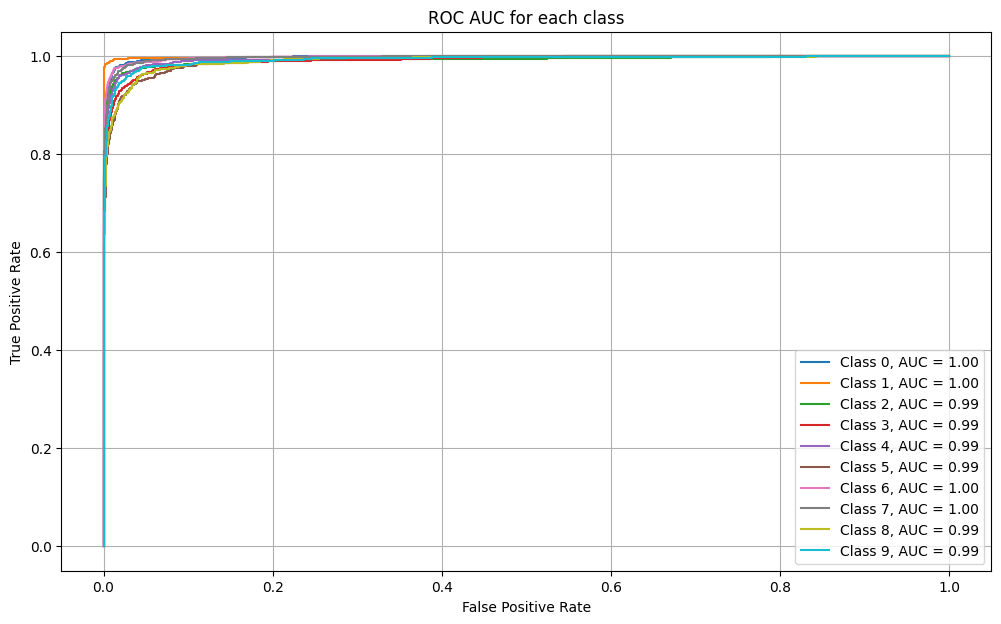

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]

# DNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation=None, kernel_regularizer=l2(0.001)), # Added regularization
    BatchNormalization(),  # Added Batch Normalization before activation
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(10, activation='softmax')
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.01)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=20, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Epoch 1/20
782/782 [==============================] - 12s 11ms/step - loss: 0.6994 - accuracy: 0.9057 - val_loss: 0.4185 - val_accuracy: 0.9577
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.4180 - accuracy: 0.9429 - val_loss: 0.3257 - val_accuracy: 0.9588
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.3372 - accuracy: 0.9476 - val_loss: 0.2927 - val_accuracy: 0.9578
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.3068 - accuracy: 0.9493 - val_loss: 0.2640 - val_accuracy: 0.9620
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2904 - accuracy: 0.9510 - val_loss: 0.2575 - val_accuracy: 0.9595
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2753 - accuracy: 0.9545 - val_loss: 0.2265 - val_accuracy: 0.9690
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.2719 - accuracy: 0.9541 - val_loss: 0.2499 - val_accuracy: 0.9608
Epoc

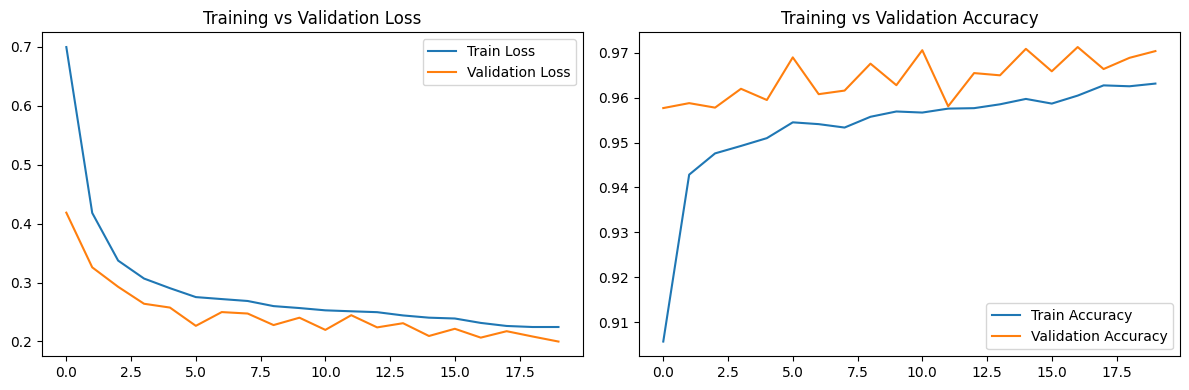

313/313 [==============================] - 1s 4ms/step
F1 Score: 0.9707


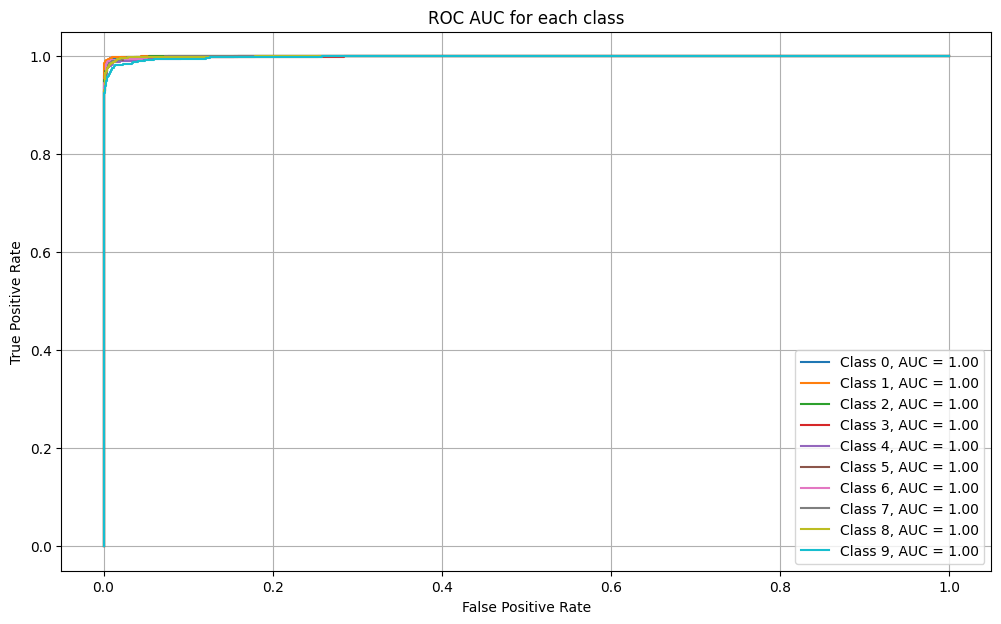

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]

# DNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation=None, kernel_regularizer=l2(0.001)), # Added regularization
    BatchNormalization(),  # Added Batch Normalization before activation
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(10, activation='softmax')
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=20, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Epoch 1/20
782/782 [==============================] - 13s 11ms/step - loss: 1.1644 - accuracy: 0.8209 - val_loss: 0.7302 - val_accuracy: 0.9335
Epoch 2/20
782/782 [==============================] - 8s 11ms/step - loss: 0.7493 - accuracy: 0.9195 - val_loss: 0.6229 - val_accuracy: 0.9498
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.6520 - accuracy: 0.9338 - val_loss: 0.5534 - val_accuracy: 0.9586
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.5847 - accuracy: 0.9436 - val_loss: 0.5082 - val_accuracy: 0.9625
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.5334 - accuracy: 0.9509 - val_loss: 0.4658 - val_accuracy: 0.9660
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 0.4880 - accuracy: 0.9556 - val_loss: 0.4357 - val_accuracy: 0.9680
Epoch 7/20
782/782 [==============================] - 3s 3ms/step - loss: 0.4569 - accuracy: 0.9575 - val_loss: 0.4057 - val_accuracy: 0.9699
Ep

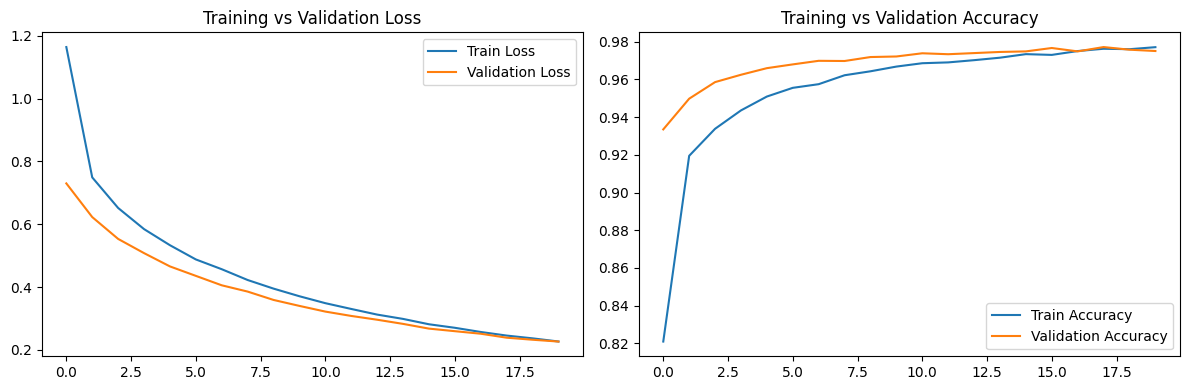

313/313 [==============================] - 0s 1ms/step
F1 Score: 0.9747


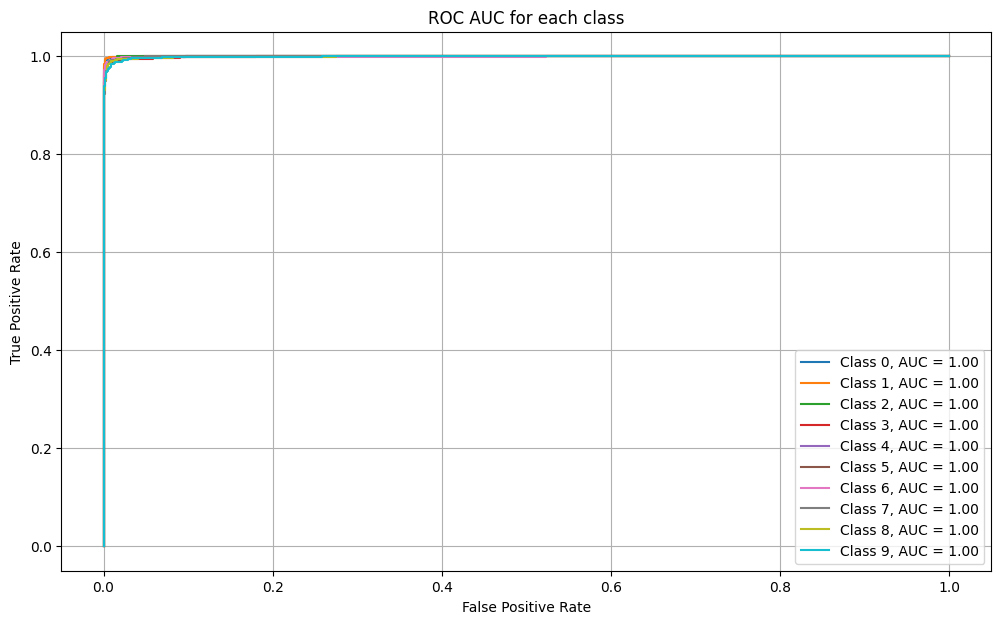

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]

# DNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation=None, kernel_regularizer=l2(0.001)), # Added regularization
    BatchNormalization(),  # Added Batch Normalization before activation
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)), # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Added regularization
    Dropout(0.1),  # Increased dropout rate
    Dense(10, activation='softmax')
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=20, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

